In [52]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy import stats
import statistics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error, make_scorer
import seaborn as sns

import os
from scipy.stats import skew, probplot, norm
import sklearn.model_selection as ms
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, Lasso, ElasticNet 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

In [53]:
train = pd.read_csv('/Users/Muyan/Desktop/ML_Project/train.csv')
test = pd.read_csv('/Users/Muyan/Desktop/ML_Project/test.csv')

In [54]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [55]:
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [56]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [57]:
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 100)
plt.rcParams['figure.figsize']= [8.0, 4.0]

In [58]:
# categorical features
categorical_feat1 = train.columns[train.dtypes=='object'].tolist()

# numerical features
numeric_feat1 = train.columns[(train.dtypes=='int64')|(train.dtypes=='float64')].drop('SalePrice').tolist()

print('categorical features:\n{}\n{}'.format(sorted(categorical_feat1), len(categorical_feat1)))
print('\nnumerical features:\n{}\n{}'.format(sorted(numeric_feat1), len(numeric_feat1)))

categorical features:
['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']
43

numerical features:
['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'Overall

In [59]:
def check_missingness(df):
    missing_features = df.columns[df.isna().any()]

    # how bad is the missing ?
    missing = {}
    for i in missing_features:
        missing[i]= df[i].isna().sum()
    missing = pd.Series(missing).sort_values(ascending=False)
    return missing

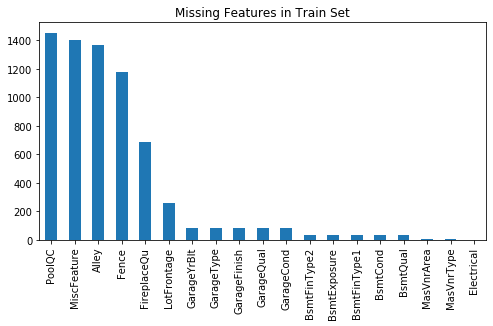

In [60]:
check_missingness(train)[:20].plot(kind='bar')
plt.title('Missing Features in Train Set')
plt.savefig('train_missing.png',bbox_inches='tight')

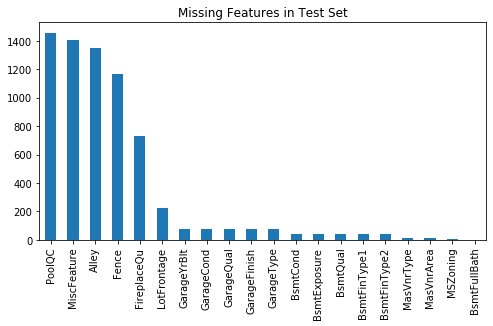

In [61]:
check_missingness(test)[:20].plot(kind='bar')
plt.title('Missing Features in Test Set')

plt.savefig('test_missing.png',bbox_inches='tight')

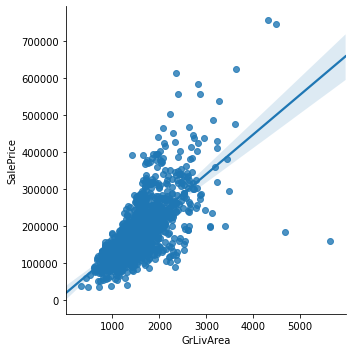

In [62]:
sns.lmplot(x='GrLivArea', y= 'SalePrice', data=train)
plt.savefig('saleprice_grlivarea.png',bbox_inches='tight')

(-0.5, 9.5, 0, 800000)

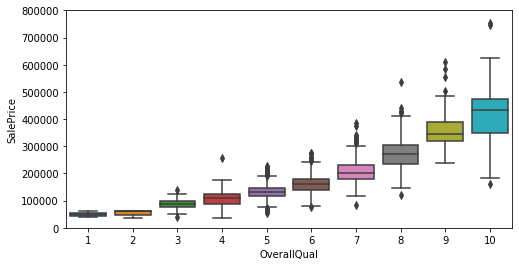

In [63]:
sns.boxplot(train.OverallQual, train.SalePrice)
plt.axis(ymin=0, ymax=800000)

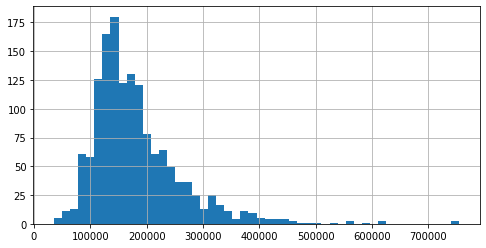

In [64]:
train.SalePrice.hist(bins=50)
plt.savefig('saleprice.png',bbox_inches='tight')

In [14]:
# Correlation

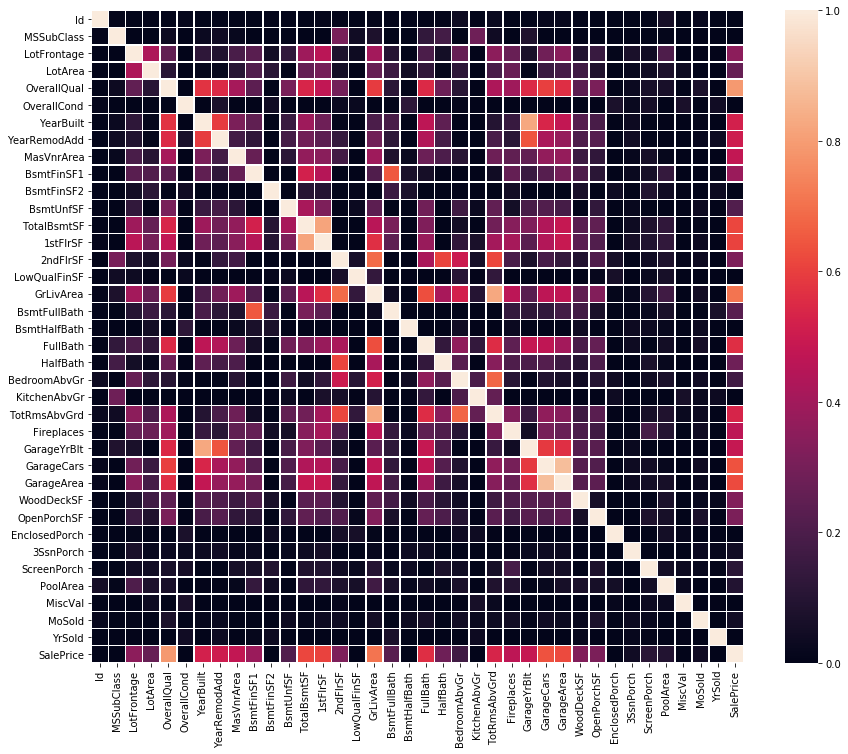

In [15]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat,linewidths=.5,vmin=0, vmax=1, square=True)

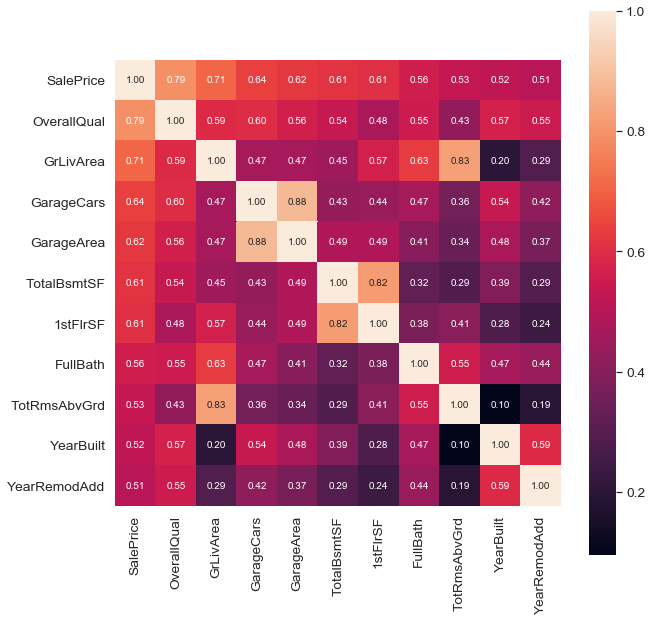

In [16]:
plt.figure(figsize=(10,10))
cols = corrmat.nlargest(11, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

In [17]:
# sns.set()
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# sns.pairplot(train[cols], height = 2.5)
# plt.show()

In [18]:
# Data Processing

In [65]:
def process_missing(df):
   
    # fill LotFrontage missings with median value in the same neighborhood
    df['LotFrontage'] = df[['Neighborhood','LotFrontage']].groupby('Neighborhood').transform(lambda x: x.fillna(x.median()))

    # impute MSZoning missings as the most frequent value in the same MSSubClass
    df['MSZoning'] = df[['MSSubClass', 'MSZoning']].groupby('MSSubClass').transform(lambda x: x.fillna(x.mode()[0]))

    df['Utilities'] =df['Utilities'].fillna(df['Utilities'].mode()[0])

    df['Exterior1st'] = df['Exterior1st'].fillna('Wd Sdng')
    df['Exterior2nd'] = df['Exterior2nd'].fillna('Wd Sdng')

    df['Electrical']=df.groupby('Neighborhood')['Electrical'].transform(lambda x: x.fillna(x.mode()[0]))

    df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])
    df['KitchenQual'] = df.groupby('Neighborhood')['KitchenQual'].transform(lambda x: x.mode()[0])
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    
    df[numeric_feat1] = df[numeric_feat1].fillna(0)
    df[categorical_feat1] = df[categorical_feat1].fillna('None')

    #print(df.head())
    return df

In [66]:
all_data = pd.concat([train.copy().drop(columns=['SalePrice']), test.copy()], axis=0)

In [67]:
all_data = process_missing(all_data)

In [68]:
all_data.isnull().any().sum()

0

In [69]:
# Feature Engineering

In [70]:
def Feat_engineering1(data):
    df = data.copy()
    # drop 'Id', 'Street', 'Utilities','PoolQC'
    to_remove=set(['Id', 'Street', 'Utilities','PoolQC', 'PoolArea', 'HalfBath', 'BsmtHalfBath', 'FullBath', 'BsmtFullBath',\
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF','TotalBsmtSF', '1stFlrSF',\
                  '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd'])
    # convert PoolArea to binary
    df['HasPool'] = df['PoolArea'].apply(lambda x: 'Yes' if x>0 else 'No')

    # convert to categorical
    df[['KitchenAbvGr', 'TotRmsAbvGrd', 'BedroomAbvGr', 'GarageCars']] = df[['KitchenAbvGr', 'TotRmsAbvGrd', 'BedroomAbvGr', 'GarageCars']].astype(str)

    # combine features of 'HalfBath', 'BsmtHalfBath', 'FullBath', 'BsmtFullBath'
    df['TotalBath'] = df['HalfBath']/2 + df['BsmtHalfBath']/2 + df['FullBath'] + df['BsmtFullBath']
    df['TotalBath'] = df['TotalBath'].astype('str')

    # combine features of 'OpenPorchSF', 'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'WoodDeckSF'
    df['Total_PorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'] + df['WoodDeckSF']

    # combine features of TotalSF = TotalBsmtSF + X1stFlrSF + X2ndFlrSF
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    # combine features of 'BsmtFinSF1', 'BsmtFinSF2', 'X1stFlrSF', 'X2ndFlrSF'
    df['TotalFinSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF']

    # combine 'YearBuilt', 'YearRemodAdd'
    df['YearBuildRemod'] = df['YearBuilt'] + df['YearRemodAdd']

    # add new features
    df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 'Yes' if x>0 else 'No')

    df['Has2ndFlr'] = df['2ndFlrSF'].apply(lambda x: 'Yes' if x>0 else 'No')

    df['HasBasement'] = df['TotalBsmtSF'].apply(lambda x: 'Yes' if x>0 else 'No')

    new_columns = list(set(df.columns).difference(to_remove))
    

    return df[new_columns]

In [71]:
def Feat_engineering(data):
    df = data.copy()
    
     # convert to categorical
    to_categorical = ['KitchenAbvGr', 'TotRmsAbvGrd', 'BedroomAbvGr', 
                      'GarageCars', 'HalfBath','BsmtHalfBath',
                      'FullBath','BsmtFullBath','Fireplaces']
    
    df[to_categorical] = df[to_categorical].astype(str)

    # drop features
    to_remove=set(['Id', 'Street', 'Utilities','PoolQC'])
    new_columns = list(set(df.columns).difference(to_remove))
    
    return df[new_columns]

In [72]:
all_data = Feat_engineering(all_data)

In [73]:
categorical_feat = all_data.columns[all_data.dtypes=='object']
numeric_feat = all_data.columns[all_data.dtypes!='object']

In [74]:
print(len(categorical_feat))
print(len(numeric_feat))

49
27


In [18]:
# skew transform

In [75]:
def skew_transform(data):
    df = data.copy()
    skew_features = df.apply(lambda x: skew(x)).sort_values(ascending=False)

    high_skew = skew_features[skew_features > 0.75]
    skew_index = high_skew.index
    print(skew_index)

    df[skew_index] = df[skew_index].apply(lambda x: boxcox1p(x, boxcox_normmax(x+1)))
    return df

In [76]:
all_data[numeric_feat] = skew_transform(all_data[numeric_feat])

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch', 'MasVnrArea',
       'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', '1stFlrSF', 'BsmtFinSF1',
       'MSSubClass', 'GrLivArea', 'TotalBsmtSF', 'BsmtUnfSF', '2ndFlrSF'],
      dtype='object')


In [77]:
# Normalize Sale Price
salePrice = np.log(train.SalePrice)

In [78]:
plt.rcParams['figure.figsize']= [10.0, 4.0]

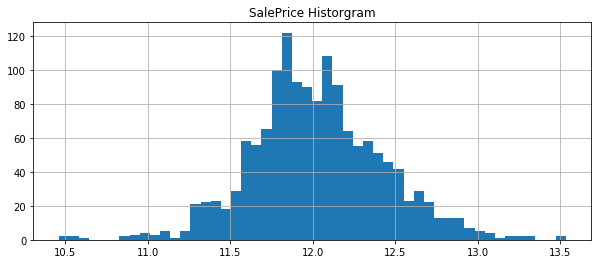

In [79]:
salePrice.hist(bins=50)
plt.title('SalePrice Historgram')
plt.savefig('saleprice_log.png',bbox_inches='tight')

In [80]:
numeric_feat

Index(['GarageYrBlt', 'MasVnrArea', 'PoolArea', 'OpenPorchSF', 'WoodDeckSF',
       'MoSold', 'OverallQual', 'OverallCond', 'LotArea', 'EnclosedPorch',
       'TotalBsmtSF', 'YearRemodAdd', 'MiscVal', 'LowQualFinSF', 'YearBuilt',
       'GrLivArea', 'BsmtFinSF1', 'BsmtFinSF2', 'GarageArea', 'LotFrontage',
       'MSSubClass', '3SsnPorch', '2ndFlrSF', 'ScreenPorch', '1stFlrSF',
       'BsmtUnfSF', 'YrSold'],
      dtype='object')

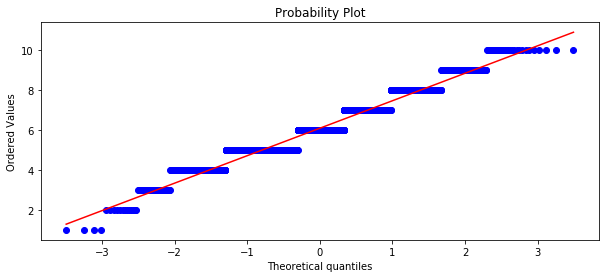

In [81]:
probplot(all_data['OverallQual'], plot=plt)
plt.savefig('overallqual transformed.png',bbox_inches='tight')

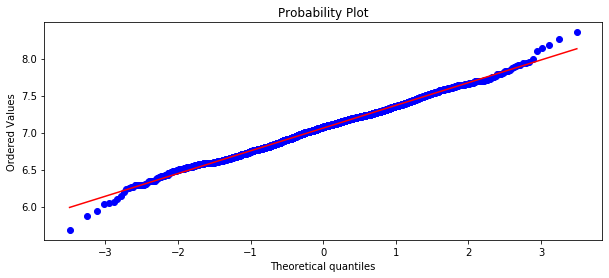

In [82]:
probplot(all_data['GrLivArea'], plot=plt)
plt.savefig('GrLivArea transform.png',bbox_inches='tight')

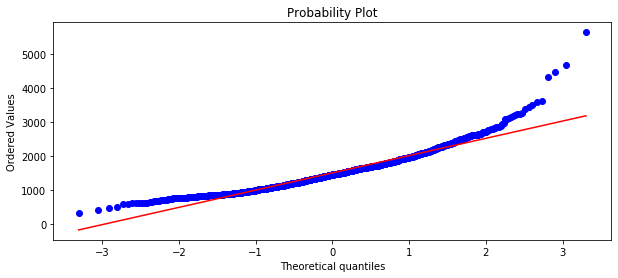

In [83]:
probplot(train['GrLivArea'], plot=plt)
plt.savefig('GrLivArea before.png',bbox_inches='tight')

In [84]:
# remove outliers

In [85]:
from scipy.stats import zscore
z_score = {}
for i in numeric_feat:
    z_score[i] = zscore(all_data[i])
z_score = pd.DataFrame(z_score)
z_score = z_score.head(train.shape[0])
for i in ['OverallQual','GrLivArea']:
    print(i,z_score[np.abs(z_score[i])>3.5][i].sort_values(ascending=False))

OverallQual 533   -3.610024
375   -3.610024
Name: OverallQual, dtype: float64
GrLivArea 1298    4.218663
523     3.646113
1182    3.512723
1100   -3.640328
533    -4.481538
Name: GrLivArea, dtype: float64


In [98]:
# choose the highest z_score from two ends as outlier
# two outliers case
outliers = [1298, 533] 

# four outliers case
outliers = [1298, 533, 523, 1100]

In [99]:
to_drop = list(map(lambda x: x[0]+'_'+x[1],[(i, all_data[i].mode()[0]) for i in categorical_feat]))

In [100]:
cat_dummy = pd.get_dummies(all_data[categorical_feat]).drop(columns=to_drop)

In [101]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_label = all_data.copy()
for i in categorical_feat:
    data_label[i] = le.fit_transform(data_label[i])

In [102]:
data_dummy = pd.concat([cat_dummy,all_data[numeric_feat]], axis=1)

In [103]:
X = data_dummy.head(train.shape[0])
X.drop(outliers, inplace=True)
y = salePrice.copy()
y.drop(outliers, inplace=True)

In [104]:
X_le=data_label.head(train.shape[0])
X_le.drop(outliers, inplace=True)

In [105]:
X.shape

(1456, 287)

In [106]:
X_le.shape

(1456, 76)

In [107]:
def get_error(X_train,y_train,X_test,y_test, model, show = True, refit = True):
    if refit: model.fit(X_train, y_train)
    train_error = 1 - r2_score(y_train, model.predict(X_train))
    test_error = 1 - r2_score(y_test,model.predict(X_test))
    if show:
        print("train error ", train_error)
        print("test error", test_error)
    return [train_error, test_error]

In [108]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=108)
train_idx = X_train.index
test_idx = X_test.index

In [109]:
plt.rcParams['figure.figsize']= [6.0, 5.0]

In [110]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

In [63]:
# Modeling

In [182]:
X_train = pd.read_csv('/Users/Muyan/Desktop/ML_Project/Yan_ML_Data/X_train.csv')
y_train = pd.read_csv('/Users/Muyan/Desktop/ML_Project/Yan_ML_Data/y_train.csv', index_col=0, names=['SalePrice'])
X_test = pd.read_csv('/Users/Muyan/Desktop/ML_Project/Yan_ML_Data/X_test.csv')
y_test = pd.read_csv('/Users/Muyan/Desktop/ML_Project/Yan_ML_Data/y_test.csv', index_col=0, names=['SalePrice'])

In [112]:
lasso = linear_model.Lasso(normalize = True)

lasso = lasso.set_params(random_state=50)

# Train the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=50, selection='cyclic',
      tol=0.0001, warm_start=False)

In [113]:
# Initial prediction
lasso_pred = lasso.predict(X_test)

# Print out MAE, MSE, and RMSE
errors = abs(np.expm1(lasso_pred) - np.expm1(y_test))

print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, lasso_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, lasso_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ Unnamed: 0    6.178992e+303
SalePrice      5.487959e+04
dtype: float64
Mean Squared Error (MSE): 551.381864826745
Root Mean Square Error (RMSE): 23.481521774083234
Mean Absolute Percent Error (MAPE): Unnamed: 0    7.697149e+24
SalePrice     3.062000e+01
dtype: float64 %.


In [114]:
#  hyperparameters should be tuned. Tune hyperparameters (lasso)
alphas = 100**np.linspace(10,-2,1000)*0.5

param_grid_lasso = {"max_iter": [5, 10, 20],
                     "alpha": alphas}

In [115]:
grid_search_lasso = ms.GridSearchCV(lasso, param_grid_lasso, scoring= 'neg_mean_squared_error', 
                                     n_jobs=-1, return_train_score = True)

%time grid_search_lasso.fit(X_train, y_train)

CPU times: user 16.2 s, sys: 1.37 s, total: 17.6 s
Wall time: 1min 29s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=50,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([5.00000000e+19, 4.73092410e+19, 4.47632856e+19, 4.23543413e+19,
       4.007...
       1.14638466e-04, 1.08469176e-04, 1.02631888e-04, 9.71087341e-05,
       9.18828100e-05, 8.69381200e-05, 8.22595294e-05, 7.78327180e-05,
       7.36441362e-05, 6.96809637e-05, 6.59310701e-05, 6.23829776e-05,
       5.90258264e-05, 5.58493409e-05, 5.28437986e-05, 5.00000000e-05]),
                         'max_iter': [5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [116]:
# get the best parameters
grid_search_lasso.best_params_

{'alpha': 0.00014302977675878753, 'max_iter': 20}

In [117]:
# Prediction using the tuned parameters
grid_lasso = grid_search_lasso.best_estimator_

In [118]:
print("The train set R^2 is: %.5f" % grid_lasso.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_lasso.score(X_test, y_test))

The train set R^2 is: 1.00000
The test set R^2 is is: 1.00000


In [126]:
#Prediction with tuned hyperparameters
grid_lasso_pred = grid_lasso.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_lasso_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_lasso_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_lasso_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ Unnamed: 0    5.641238e+299
SalePrice      1.272293e+04
dtype: float64
Mean Squared Error (MSE): 0.00614133474840683
Root Mean Square Error (RMSE): 0.07836666860602683
Mean Absolute Percent Error (MAPE): Unnamed: 0    0.37
SalePrice     7.59
dtype: float64 %.


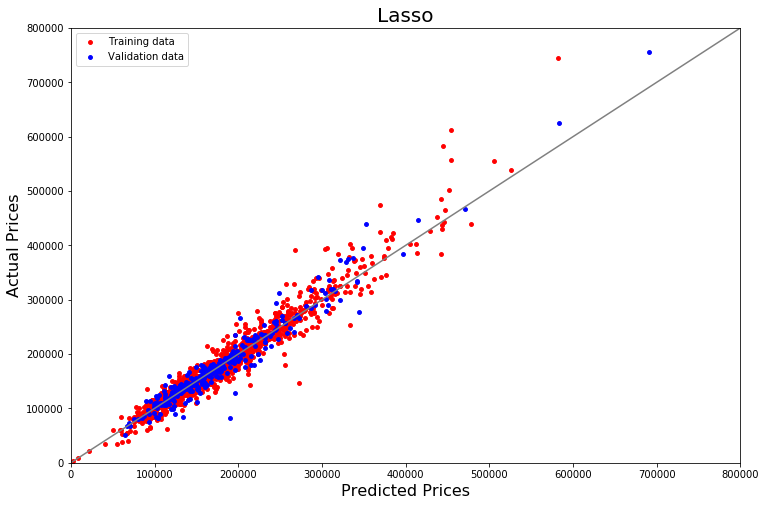

In [127]:
y_train_lasso = grid_lasso.predict(X_train)
y_test_lasso = grid_lasso.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_lasso), np.expm1(y_train), c='red', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_lasso), np.expm1(y_test), c='blue', marker='o', s=15, label = "Validation data")
plt.title("Lasso", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

In [ ]:
# Ridge

In [128]:
X_train, X_test = X.loc[train_idx], X.loc[test_idx]

In [162]:
ridge = Ridge(alpha=7, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=108, solver='auto', tol=0.001)
ridge.fit(X_train, y_train)
get_error(X_train,y_train,X_test,y_test,ridge, True,False)

train error  0.05498204942487639
test error 0.07644728142776924


[0.05498204942487639, 0.07644728142776924]

In [130]:
grid_para = dict(alpha = np.linspace(0,20,10))
ridge.set_params(random_state=108, tol=0.001)
grid_search_ridge = ms.GridSearchCV(ridge,  cv=5, param_grid=grid_para, n_jobs=-1, verbose=0)
%time grid_search_ridge.fit(X_train,y_train)  # What to call to trigger the gridSearchCV
ridge=grid_search_ridge.best_estimator_
print(ridge)
get_error(X_train,y_train,X_test,y_test,ridge, True,False)

CPU times: user 363 ms, sys: 126 ms, total: 489 ms
Wall time: 3.72 s
Ridge(alpha=20.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=108, solver='auto', tol=0.001)
train error  0.4591353054308678
test error 0.5929778971914366


[0.4591353054308678, 0.5929778971914366]

In [131]:
#Prediction with tuned hyperparameters
grid_ridge_pred = grid_search_ridge.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_ridge_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_ridge_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_ridge_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ Unnamed: 0         inf
SalePrice     12353.33
dtype: float64
Mean Squared Error (MSE): 91392.9793769674
Root Mean Square Error (RMSE): 302.3127178551498
Mean Absolute Percent Error (MAPE): Unnamed: 0     inf
SalePrice     7.39
dtype: float64 %.


In [ ]:
# Tune hyperparameters (Ridge)

In [132]:
alphas = 100**np.linspace(10,-2,1000)*0.5

param_grid_ridge = {"max_iter": [5, 10, 20],
                     "alpha": alphas}

In [133]:
grid_search_ridge = ms.GridSearchCV(lasso, param_grid_ridge, scoring= 'neg_mean_squared_error', 
                                     n_jobs=-1, return_train_score = True)

%time grid_search_ridge.fit(X_train, y_train)

CPU times: user 13.8 s, sys: 1.69 s, total: 15.5 s
Wall time: 1min 24s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=50,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([5.00000000e+19, 4.73092410e+19, 4.47632856e+19, 4.23543413e+19,
       4.007...
       1.14638466e-04, 1.08469176e-04, 1.02631888e-04, 9.71087341e-05,
       9.18828100e-05, 8.69381200e-05, 8.22595294e-05, 7.78327180e-05,
       7.36441362e-05, 6.96809637e-05, 6.59310701e-05, 6.23829776e-05,
       5.90258264e-05, 5.58493409e-05, 5.28437986e-05, 5.00000000e-05]),
                         'max_iter': [5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [163]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_ridge = {"max_iter": [5, 10, 20],
                     "alpha": alphas}

random_search_ridge = ms.RandomizedSearchCV(ridge, param_grid_ridge, n_iter=1500, scoring= 'neg_mean_squared_error', 
                                     n_jobs=-1, return_train_score = True)
random_search_ridge.fit(X_train, y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=Ridge(alpha=7, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=108, solver='auto', tol=0.001),
                   iid='warn', n_iter=1500, n_jobs=-1,
                   param_distributions={'alpha': array([5.00000000e+19, 4.73092410e+19, 4.47632856e+19, 4.23543413e+19,
       4.00750348e+19, 3.79183896e+19, 3.5...
       1.14638466e-04, 1.08469176e-04, 1.02631888e-04, 9.71087341e-05,
       9.18828100e-05, 8.69381200e-05, 8.22595294e-05, 7.78327180e-05,
       7.36441362e-05, 6.96809637e-05, 6.59310701e-05, 6.23829776e-05,
       5.90258264e-05, 5.58493409e-05, 5.28437986e-05, 5.00000000e-05]),
                                        'max_iter': [5, 10, 20]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squ

In [165]:
random_search_ridge.best_params_

{'max_iter': 20, 'alpha': 4.965545906874911}

In [166]:
# get the best parameters
grid_search_ridge.best_params_

{'alpha': 5e+19, 'max_iter': 5}

In [135]:
grid_ridge = grid_search_ridge.best_estimator_

In [172]:
print("The train set R^2 is: %.5f" % random_search_ridge.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % random_search_ridge.score(X_test, y_test))

The train set R^2 is: -0.00845
The test set R^2 is is: -0.01164


In [170]:
#Prediction with tuned hyperparameters
random_ridge_pred = random_search_ridge.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(random_ridge_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, random_ridge_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, random_ridge_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ SalePrice    12312.66
dtype: float64
Mean Squared Error (MSE): 0.011644853018080728
Root Mean Square Error (RMSE): 0.10791132015725101
Mean Absolute Percent Error (MAPE): SalePrice    7.49
dtype: float64 %.


In [179]:
y_train_ridge = random_search_ridge.predict(X_train)
y_test_ridge = random_search_ridge.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_ridge), np.expm1(y_train), c='red', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_ridge), np.expm1(y_test), c='blue', marker='o', s=15, label = "Validation data")
plt.title("Ridge", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

ValueError: shapes (1164,288) and (287,1) not aligned: 288 (dim 1) != 287 (dim 0)

In [ ]:
# ElasticNet

In [180]:
eNet = linear_model.ElasticNet(normalize = True)

eNet.set_params(random_state=12)

# Train the model on training data
eNet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=12, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Initial prediction
eNet_pred = eNet.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_ridge_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, random_eNet_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test,random_eNet_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [ ]:
# Tune hyperparameters (eNet)

In [120]:
param_grid_eNet = {"max_iter": [5, 10, 20],
                    "alpha": 100**np.linspace(10,-2,1000)*0.5,
                    "l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [ ]:
grid_search_eNet = ms.GridSearchCV(eNet, param_grid_eNet, scoring= 'neg_mean_squared_error', 
                                    n_jobs=-1, return_train_score = True)

%time grid_search_eNet.fit(X_train, y_train)

In [118]:
# get the best parameters
grid_search_eNet.best_params_

{'alpha': 0.023207944168063956, 'l1_ratio': 0.0, 'max_iter': 10}

In [119]:
# Prediction using the tuned parameters
grid_eNet = grid_search_eNet.best_estimator_

In [ ]:
print("The train set R^2 is: %.5f" % grid_eNet.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_eNet.score(X_test, y_test))

In [ ]:
#Prediction with tuned hyperparameters
random_eNet_pred = random_eNet.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(random_ridge_pred) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, random_eNet_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, random_eNet_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [ ]:
# Random Forest

In [87]:
rforest = RandomForestRegressor()

rforest.set_params(random_state=52)

# Train the model on training data
rforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=52, verbose=0,
                      warm_start=False)

In [88]:
print("The train set R^2 is: %.5f" % rforest.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % rforest.score(X_test, y_test))

The train set R^2 is: 0.79629
The test set R^2 is is: -0.23261


In [89]:
# Initial prediction
rforest_pred = rforest.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(rforest_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, rforest_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, rforest_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ Unnamed: 0         inf
SalePrice     26452.53
dtype: float64
Mean Squared Error (MSE): 101557.18528094245
Root Mean Square Error (RMSE): 318.6803810731725
Mean Absolute Percent Error (MAPE): Unnamed: 0      inf
SalePrice     14.36
dtype: float64 %.


In [ ]:
# Tune hyperparameters

In [91]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

In [92]:
param_grid ={'max_depth': [20, 25, 30],
             'max_features': ['auto','sqrt','log2'],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[1, 3, 5],
             'n_estimators': [500, 750, 1000, 1250, 1500]}

In [ ]:
grid_search_rforest = ms.GridSearchCV(rforest, param_grid, scoring='neg_mean_squared_error', 
                                      n_jobs=-1, return_train_score = True)

%time grid_search_rforest.fit(X_train, y_train)

In [ ]:
# get the best parameters
grid_search_rforest.best_params_

In [ ]:
# Prediction using the tuned parameters
grid_rforest = grid_search_rforest.best_estimator_

In [ ]:
print("The train set R^2 is: %.5f" % grid_rforest.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_rforest.score(X_test, y_test))

In [ ]:
#Prediction with tuned hyperparameters
grid_rforest_pred = grid_rforest.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_rforest_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_rforest_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_rforest_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [ ]:
y_train_rForest = grid_rforest.predict(X_train)
y_test_rForest = grid_rforest.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_rForest), np.expm1(y_train), c='black', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_rForest), np.expm1(y_test), c='orange', marker='o', s=15, label = "Validation data")
plt.title("Random Forest", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

In [ ]:
# Gradient Boosting

In [ ]:
gbm = GradientBoostingRegressor()

gbm.set_params(random_state=42)

In [ ]:
# Train model on training data
gbm.fit(X_train, y_train)

In [85]:
print("The train set R^2 is: %.5f" % gbm.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % gbm.score(X_test, y_test))

NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [111]:
# Initial prediction
gbm_pred = gbm.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(gbm_pred) - np.expm1(y_test.SalePrice))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, gbm_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, gbm_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 14893.8
Mean Squared Error (MSE): 0.015200394141492565
Root Mean Square Error (RMSE): 0.12328987850384379
Mean Absolute Percent Error (MAPE): SalePrice   NaN
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
30          NaN
31          NaN
32          NaN
33          NaN
34          NaN
35          NaN
36          NaN
37          NaN
38          NaN
39          NaN
40          NaN
41          NaN
42          NaN
43          NaN
44          NaN
45          NaN
46          NaN
47          NaN
48          NaN
             ..
242         N

In [ ]:
# Tune hyperparameters (GBM)

In [ ]:
gbm_param_grid={'n_estimators':[300, 400, 500, 600],
                'learning_rate':[0.05, 0.1, 1.5],
                'max_depth':[1, 2, 3],
                'min_samples_leaf':[1, 2, 3, 4]}

In [ ]:
grid_search_gbm = GridSearchCV(gbm, gbm_param_grid, scoring='neg_mean_squared_error', 
                                     n_jobs=-1, return_train_score = True, verbose = 1)

%time  grid_search_gbm.fit(X_train, y_train)

In [ ]:
# get the best parameters
grid_search_gbm.best_params_

In [ ]:
grid_gbm = grid_search_gbm.best_estimator_

In [ ]:
#Prediction with tuned hyperparameters
grid_gbm_pred = grid_gbm.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_gbm_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, pd.DataFrame(grid_gbm_pred[1]))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, pd.DataFrame(grid_gbm_pred[1])))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [ ]:
gbm_param_grid1={'n_estimators':[1000, 2000, 3000],
                'learning_rate':[0.01, 0.05, 0.1],
                'max_depth':[2, 3, 4],
                'min_samples_leaf':[5, 10, 15],
                'min_samples_split': [5, 10],
                'loss':['huber']}

In [ ]:
grid_search_gbm1 = GridSearchCV(gbm, gbm_param_grid1, scoring='neg_mean_squared_error', 
                                      n_jobs=-1, return_train_score = True, verbose = 1)

%time  grid_search_gbm1.fit(X_train, y_train)

In [ ]:
# get the best parameters
grid_search_gbm1.best_params_

In [ ]:
grid_gbm1 = grid_search_gbm1.best_estimator_

In [ ]:
#Prediction with tuned hyperparameters
grid_gbm_pred1 = grid_gbm1.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_gbm_pred1) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_gbm_pred1))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_gbm_pred1)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [ ]:
print("The train set R^2 is: %.5f" % grid_gbm.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_gbm.score(X_test, y_test))

In [ ]:
y_train_gradientboost = grid_gbm.predict(X_train)
y_test_gradientboost = grid_gbm.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_gradientboost), np.expm1(y_train), c='black', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_gradientboost), np.expm1(y_test), c='orange', marker='o', s=15, label = "Validation data")
plt.title("Gradient Boosting", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

In [ ]:
# XGBoost

In [ ]:
xgb = XGBRegressor()

xgb.set_params(random_state=22)

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
print("The train set R^2 is: %.5f" % xgb.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % xgb.score(X_test, y_test))

In [ ]:
# Initial prediction
xgb_pred = xgb.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(xgb_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, xgb_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, xgb_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [ ]:
# Tune

In [ ]:
xgb_param_grid ={'learning_rate': [0.01, 0.05, 0.1],
                 'max_depth': [2, 3, 4, 5, 6],
                 'min_child_weight': [4, 5, 6],
                 'n_estimators': [400, 450, 500, 550, 600]}

grid_search_xgb = GridSearchCV(xgb, xgb_param_grid, scoring='neg_mean_squared_error', 
                                     n_jobs=-1, return_train_score = True)

%time grid_search_xgb.fit(X_train, y_train)

In [ ]:
# get the best parameters
grid_search_xgb.best_params_

In [ ]:
grid_xgb = grid_search_xgb.best_estimator_

In [ ]:
print("The train set R^2 is: %.5f" % grid_xgb.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_xgb.score(X_test, y_test))

In [ ]:
#Prediction with tuned hyperparameters
grid_xgb_pred = grid_xgb.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_xgb_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_xgb_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_xgb_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [ ]:
xgb_param_grid1 ={'learning_rate': [0.01],
                 'max_depth': [3],
                 'min_child_weight': [0],
                 'n_estimators': [3460],
                 'subsample': [0.7],
                 'colsample_bytree' : [0.7],
                 'objective':['reg:linear'],
                 'nthread':[-1],
                 'scale_pos_weight':[1],
                 'seed':[27],
                 'reg_alpha': [0.00006]}
                 

grid_search_xgb1 = GridSearchCV(xgb, xgb_param_grid1, scoring='neg_mean_squared_error', 
                                     cv= kf, n_jobs=-1, return_train_score = True)

%time grid_search_xgb1.fit(X_train, y_train)

In [ ]:
grid_search_xgb1.best_params_

In [ ]:
grid_xgb1 = grid_search_xgb1.best_estimator_

In [ ]:
print("The train set R^2 is: %.5f" % grid_xgb1.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_xgb1.score(X_test, y_test))

In [ ]:
#Prediction with tuned hyperparameters
grid_xgb_pred1 = grid_xgb1.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_xgb_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_xgb_pred1))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_xgb_pred1)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [ ]:
y_train_xgboost =grid_xgb.predict(X_train)
y_test_xgboost = grid_xgb.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_xgboost), np.expm1(y_train), c='black', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_xgboost), np.expm1(y_test), c='orange', marker='o', s=15, label = "Validation data")
plt.title("XGBoost", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

In [ ]:
# Stacking

In [ ]:
from mlxtend.regressor import StackingCVRegressor

In [ ]:
stack = StackingCVRegressor(regressors=(grid_lasso, grid_eNet, grid_rforest,
                                        grid_gbm, grid_xgb),
                                meta_regressor=grid_xgb, shuffle = True,
                                random_state = 100,
                                use_features_in_secondary=True)

In [ ]:
%time stack.fit(X_train,y_train)

In [ ]:
print("The train set R^2 is: %.5f" % stack.score(np.array(X_train), np.array(y_train)))
print("The test set R^2 is is: %.5f" % stack.score(np.array(X_test), np.array(y_test)))

In [ ]:
# Initial prediction
stack_pred = stack.predict(np.array(X_test))

# Calculate the absolute errors
errors = abs(np.expm1(stack_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, stack_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, stack_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [ ]:
# meta-model ElasticNet with rforest

In [ ]:
stack1 = StackingCVRegressor(regressors=(grid_lasso, grid_eNet, grid_rforest,
                                        grid_gbm, grid_xgb),
                                meta_regressor=grid_eNet, shuffle = True,
                                random_state = 11,
                                use_features_in_secondary=True)

In [ ]:
%time stack1.fit(np.array(X_train), np.array(y_train))

In [ ]:
print("The train set R^2 is: %.5f" % stack1.score(np.array(X_train), np.array(y_train)))
print("The test set R^2 is is: %.5f" % stack1.score(np.array(X_test), np.array(y_test)))

In [ ]:
# Initial prediction
stack1_pred = stack1.predict(np.array(X_test))

# Calculate the absolute errors
errors = abs(np.expm1(stack1_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, stack1_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, stack1_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [ ]:
# Meta-model ElasticNet w/o rforest

In [ ]:
stack2 = StackingCVRegressor(regressors=(grid_lasso, grid_eNet, grid_gbm1, grid_xgb1),
                                meta_regressor=grid_eNet, shuffle = True,
                                random_state = 11,
                                use_features_in_secondary=True)

In [ ]:
%time stack2.fit(np.array(X_train), np.array(y_train))

In [ ]:
print("The train set R^2 is: %.5f" % stack2.score(np.array(X_train), np.array(y_train)))
print("The test set R^2 is is: %.5f" % stack2.score(np.array(X_test), np.array(y_test)))

In [ ]:
# Initial prediction
stack2_pred = stack2.predict(np.array(X_test))

# Calculate the absolute errors
errors = abs(np.expm1(stack1_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, stack2_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, stack2_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [ ]:
stack1 = StackingCVRegressor(regressors=(grid_lasso, grid_eNet,  
                                         grid_gbm, grid_xgb),
                            meta_regressor=grid_xgb, 
                            random_state=91,
                            use_features_in_secondary=True)

params_stack1 = {'lasso__alpha': alphas,
                'lasso__max_iter': 20,
                'elasticnet__l1_ratio' :np.arange(0.0, 1.0, 0.1),
                'elasticnet__alpha': alphas,
                'gradientboostingregressor__n_estimators':[600, 650],
                'gradientboostingregressor__learning_rate':[0.01, 0.05, 0.1],
                'gradientboostingregressor__max_depth':[1, 2],
                'gradientboostingregressor__min_samples_leaf':[3, 4],
                'xgbregressor__learning_rate': [0.05, 0.075],
                'xgbregressor__max_depth': [4, 5, 6],
                'xgbregressor__n_estimators':[250, 500, 750]
                }
                

grid_search_stack1 = GridSearchCV(estimator=stack1, param_grid = params_stack1, cv=kf, 
                                  scoring = 'neg_mean_squared_error', return_train_score = True)

%time grid_search_stack1.fit(np.array(X_train), np.array(y_train))

In [ ]:
def rmse_stacking(model):
    kf = KFold(n_splits = 5, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, np.array(X_train), y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
score = rmse_stacking(stack2)
print("\nStacking score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
stack1 = StackingCVRegressor(regressors=(grid_lasso, grid_elasticnet, randomforestregressor, 
                                        gradientboostingregresor, xgbregressor),
                            meta_regressor=xgbregressor, 
                            random_state=74,
                            use_features_in_secondary=True)



params_stack = {'lasso__alpha': alphas,
                'lasso__max_iter': [5, 10, 20]}
                
                ,
                'learning_rate':[0.05, 0.1, 1.5],
                'max_depth':[1, 2, 3],
                'min_samples_leaf':[1, 2, 3, 4]

grid = GridSearchCV(estimator=stack1, param_grid = params_stack, cv=kf, refit=True)

In [ ]:
'elasticnet__alpha': alphas,
                'elasticnet__l1_ratio' : l1_ratio,
                'randomforestregressor_max_depth': [10, 20, 30, 40],
                'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'],
                'randomforestregressor__n_estimators': [100, 300, 500],
                'randomforestregressor__min_samples_split': [2,3,4],
                'gradientboostingregressor__n_estimators':[500, 1000, 2000, 3000, 5000],
                'gradientboostingregressor__learning_rate':[0.1,0.2,0.3],
                'gradientboostingregressor__max_depth':[2,3,4],
                'gradientboostingregressor__min_samples_leaf':[1,2,3],
                'xgbregressor__learning_rate': [0.01, 0.05, 0.1, 0.5],
                'xgbregressor__max_depth': [3,5,7],
                'xgbregressor__n_estimators':[100, 500, 1000]}

In [ ]:
# GridSearchCV to tune hyperparameters

grid.fit(np.array(X_train), y_train)

print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

In [ ]:
y_train_stack = stack2.predict(np.array(X_train))
y_test_stack = stack2.predict(np.array(X_test))

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_xgboost), np.expm1(y_train), c='black', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_xgboost), np.expm1(y_test), c='orange', marker='o', s=15, label = "Validation data")
plt.title("Stacking", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

In [ ]:
# Blending

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
def blend_predict(X_test):
    return ((0.1 * grid_lasso.predict(X_test)) + \
            (0.15 * grid_eNet.predict(X_test)) + \
            (0.2 * grid_gbm1.predict(X_test)) + \
            (0.2 * grid_xgb1.predict(X_test)) + \
            (0.35 * stack2.predict(np.array(X_test))))

In [ ]:
# Initial prediction
#stack2_pred = stack2.predict(np.array(X_test))

# Calculate the absolute errors
errors = abs(np.expm1(blend_predict(X_test)) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, blend_predict(X_test)))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, blend_predict(X_test))))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [176]:
# Blend Model

In [ ]:
test_predict = blend_predict(test)
id_price = list(zip(range(1461, 2920), np.expm1(test_predict)))
id_price = list(map(lambda x: [x[0], round(x[1], 1)], id_price))
final_df = pd.DataFrame(id_price, columns=['Id', 'SalePrice'])

In [ ]:
final_df.to_csv('predictions_submission.csv', index=False)

In [ ]:
test_predict2 = stack2.predict(np.array(test))
id_price = list(zip(range(1461, 2920), np.expm1(test_predict2)))
id_price = list(map(lambda x: [x[0], round(x[1], 1)], id_price))
final_df1 = pd.DataFrame(id_price, columns=['Id', 'SalePrice'])

In [ ]:
print('cross validation scores:\n')


for clf, label in zip([tuned_lasso_model, tuned_eNet_model, tuned_rForest_model, tuned_gbm_model,
                       tuned_xgb_model,stack], ['Lasso', 'elasticNet', 
                                                'Random Forest', 'Gradient Boost', 'XGBoost' 
                                                'StackingRegressor']):
    scores = cross_val_score(clf, X_train, y_train, cv = kf)
    print("R^2 Score: %0.2f (+/- %0.2f) [%s]" % (
        scores.mean(), scores.std(), label))
    
    print("Neg. MSE Score: %0.2f (+/- %0.2f) [%s]" % (
        scores.mean(), scores.std(), label))

In [ ]:
param1 = pd.DataFrame(stack.get_params().keys())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(param1)